<img src="https://www.peb-epb.brussels/pub-frontoffice/javax.faces.resource/img/header-left_fr.png.xhtml"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# [Liste des bâtiments publics disposant d’un certificat PEB bâtiment public valide] (https://www.peb-epb.brussels/pub-frontoffice/pages/anybody.xhtml)

## **Catégories de bâtiments :**

1. Services administratifs
2. Crèches
3. Enseignement du jour OU du soir
4. Enseignement du jour ET du soir
5. Enseignement supérieur
6. Hôpitaux
8. Maisons de repos, maisons de revalidation et de soins et services similaires, établissements pénitentiaires
10. Centres sportifs
11. Théatres et centres culturels
12. Musées, bibliothèques, médiathèques et services similaires
13. Ateliers, centres funéraires, dépôts, ...mm

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### First step: loading the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the dataset and exploring its content

In [2]:
## Create dataframe
batiments = pd.read_csv('batiments.csv')
batiments.head()

,N° BCE,Organisation publique,Catégorie,Nom du bâtiment,Adresse,Indice d’émission de CO2 [kg éq CO2/(m².an)],Niveau de performance énergétique [kWhEP/(m².an)],Classe
0,0678.485.603,Agence Bruxelloise pour l'accompagnement de l'...,1 - Services administratifs,ABAE/BAOB,"Chaussée de Charleroi 110, 1060 Saint-Gilles",35.65,215.73,C+
1,0430.973.770,Ancienne Belgique,11 - Théatres et centres culturels,AB Ancienne Belgique,"Boulevard Anspach 110, 1000 Bruxelles",54.33,330.94,E+
2,0207.366.501,Commune de Molenbeek-Saint-Jean,4 - Enseignement du jour ET du soir,Academie de Dessin et des Arts visuels,"Rue Mommaerts 2A, 1080 Molenbeek-Saint-Jean",26.18,150.67,C
3,0207.365.709,Administration Communale d'Evere,1 - Services administratifs,Académie de musique,"Rue Edouard Stuckens 125, 1140 Evere",29.00,171.88,B-
4,0207.389.859,Commune de Woluwe-Saint-Lambert,4 - Enseignement du jour ET du soir,Académie de Woluwe-Saint-LambertADEMIE DE MUSI...,"Avenue des Deux Tilleuls 2A, 1200 Woluwe-Saint...",28.98,166.71,C-


### Dataset SUMMARY

In [3]:
batiments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   N° BCE                                             408 non-null    object 
 1   Organisation publique                              408 non-null    object 
 2   Catégorie                                          408 non-null    object 
 3   Nom du bâtiment                                    408 non-null    object 
 4   Adresse                                            408 non-null    object 
 5   Indice d’émission de CO2 [kg éq CO2/(m².an)]       408 non-null    float64
 6   Niveau de performance énergétique [kWhEP/(m².an)]  408 non-null    float64
 7   Classe                                             408 non-null    object 
dtypes: float64(2), object(6)
memory usage: 25.6+ KB


In [4]:
print(f'The dataset has {batiments.shape[0]} buildings with {batiments.shape[1]} attributes.')
print(f'The buildings contained in the dataset belong to {batiments[batiments.columns[2]].unique().shape[0]} different categories.')

The dataset has 408 buildings with 8 attributes.
The buildings contained in the dataset belong to 13 different categories.


### After cleaning, each of the certified buildings has the following information:

In [5]:
batiments.iloc[335]

N° BCE                                                                                 0419.700.390
Organisation publique                                                                   ASBL Triton
Catégorie                                                                              9 - Piscines
Nom du bâtiment                                                                      Piscine Triton
Adresse                                              Avenue des Anciens Combattants 260, 1140 Evere
Indice d’émission de CO2 [kg éq CO2/(m².an)]                                                1162.71
Niveau de performance énergétique [kWhEP/(m².an)]                                           6681.05
Classe                                                                                            D
Name: 335, dtype: object

## Some dataframe's manipulations

For the attribute *'Catégorie'*: 
* a new column containing its initial digit is created
* the digit is removed from the original column

Additionally only the columns: *Catégorie, Nom du bâtiment, Indice d’émission de CO2 kg éqCO2 /(m².an), Niveau de performance énergétique kWhEP/(m².an), Classe; 
** are kept **

In [6]:
# Editing and adding columns
batiments['# Catégorie'] = batiments['Catégorie'].str.extract(r'(\d+)\s\-').astype('int')
batiments['Catégorie'] = batiments['Catégorie'].str.replace(r'\d+\s\-\s','')
#---
batiments = batiments[['Organisation publique','# Catégorie', 'Catégorie', 'Indice d’émission de CO2 [kg éq CO2/(m².an)]',
       'Niveau de performance énergétique [kWhEP/(m².an)]', 'Classe']]#.sort_values('# Catégorie')
batiments.head()

,Organisation publique,# Catégorie,Catégorie,Indice d’émission de CO2 [kg éq CO2/(m².an)],Niveau de performance énergétique [kWhEP/(m².an)],Classe
0,Agence Bruxelloise pour l'accompagnement de l'...,1,Services administratifs,35.65,215.73,C+
1,Ancienne Belgique,11,Théatres et centres culturels,54.33,330.94,E+
2,Commune de Molenbeek-Saint-Jean,4,Enseignement du jour ET du soir,26.18,150.67,C
3,Administration Communale d'Evere,1,Services administratifs,29.00,171.88,B-
4,Commune de Woluwe-Saint-Lambert,4,Enseignement du jour ET du soir,28.98,166.71,C-


## Detecting outliers

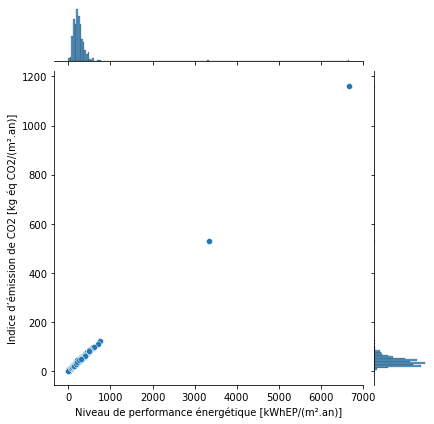

In [7]:
sns.jointplot(x='Niveau de performance énergétique [kWhEP/(m².an)]',y='Indice d’émission de CO2 [kg éq CO2/(m².an)]',data=batiments)#, kind='reg')

In [8]:
batiments.sort_values('Niveau de performance énergétique [kWhEP/(m².an)]',ascending=False).head(5)

,Organisation publique,# Catégorie,Catégorie,Indice d’émission de CO2 [kg éq CO2/(m².an)],Niveau de performance énergétique [kWhEP/(m².an)],Classe
335,ASBL Triton,9,Piscines,1162.71,6681.05,D
367,SMALS,13,"Ateliers, centres funéraires, dépôts, ...",528.27,3336.14,G
89,Cliniques universitaires Saint-Luc,6,Hôpitaux,123.49,750.47,F
225,Hôpital Erasme,7,Centres de santé et services similaires,111.41,705.11,G
329,Palais des Beaux-Arts de Bruxelles,11,Théatres et centres culturels,99.13,600.94,G


## Removing outliers

In [9]:
n_outliers = 2
idx_outliers = batiments.sort_values('Niveau de performance énergétique [kWhEP/(m².an)]',ascending=False).head(n_outliers).index
batiments.drop(index=idx_outliers, inplace=True)
batiments.sort_values('Niveau de performance énergétique [kWhEP/(m².an)]',ascending=False).head(5)

,Organisation publique,# Catégorie,Catégorie,Indice d’émission de CO2 [kg éq CO2/(m².an)],Niveau de performance énergétique [kWhEP/(m².an)],Classe
89,Cliniques universitaires Saint-Luc,6,Hôpitaux,123.49,750.47,F
225,Hôpital Erasme,7,Centres de santé et services similaires,111.41,705.11,G
329,Palais des Beaux-Arts de Bruxelles,11,Théatres et centres culturels,99.13,600.94,G
219,Hôpitaux Iris Sud,6,Hôpitaux,97.57,587.14,E
87,"Clinique Saint-Jean,CEBIODI ASBL",6,Hôpitaux,95.46,577.04,E


In [10]:
# Creating categories for classes
my_categories = pd.CategoricalDtype(categories=['G', 'F','E-','E', 'E+','D-','D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],ordered=True)
batiments['Classe'].astype(my_categories).unique()

['C+', 'E+', 'C', 'B-', 'C-', ..., 'E', 'A', 'B+', 'E-', 'A+']
Length: 16
Categories (16, object): ['G' < 'F' < 'E-' < 'E' ... 'B' < 'B+' < 'A' < 'A+']

In [11]:
np.where(batiments['# Catégorie'].unique())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),)

<AxesSubplot:xlabel='# Catégorie', ylabel='count'>

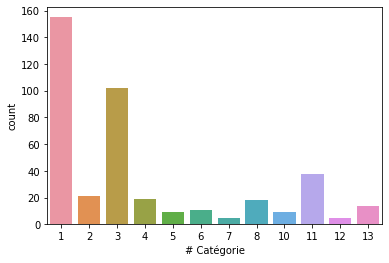

In [12]:
# AMOUNT OF CERTIFIED BUILDINGS PER CATEGORIE
# sns.countplot(x='# Catégorie', hue='Classe' ,data=batiments)
sns.countplot(x='# Catégorie',data=batiments)

<AxesSubplot:xlabel='Classe', ylabel='count'>

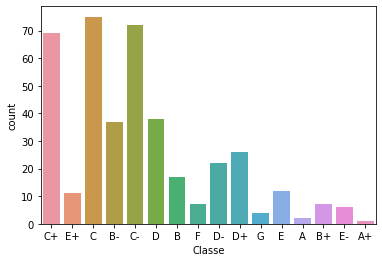

In [13]:
# AMOUNT OF CERTIFIED BUILDINGS PER CLASSE
sns.countplot(x='Classe',data=batiments, order = batiments['Classe'].unique())

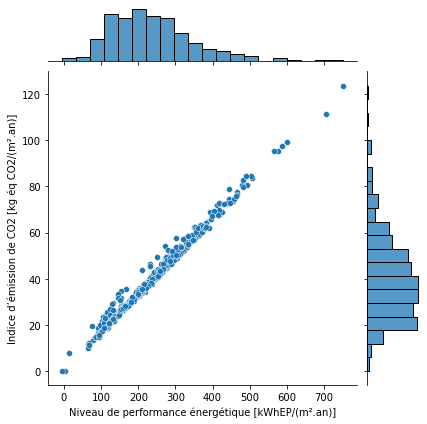

In [14]:
#Histograma de 2 variables
sns.jointplot(x='Niveau de performance énergétique [kWhEP/(m².an)]',y='Indice d’émission de CO2 [kg éq CO2/(m².an)]',data=batiments)#, kind='reg')

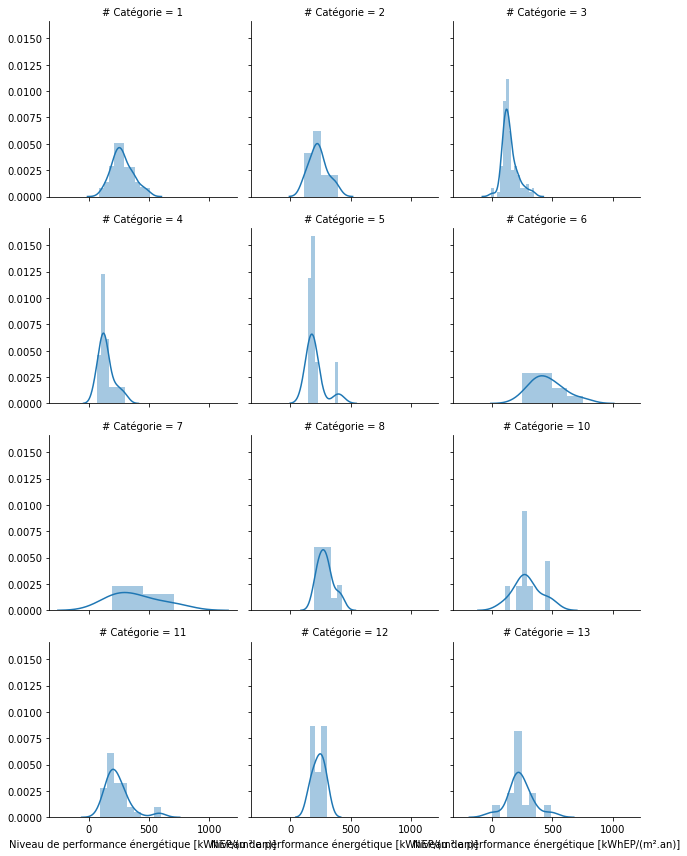

In [15]:
grafico = sns.FacetGrid(data=batiments,col='# Catégorie',col_wrap=3)#,row='smoker')
grafico.map(sns.distplot,'Niveau de performance énergétique [kWhEP/(m².an)]') 

<AxesSubplot:xlabel='# Catégorie', ylabel='Niveau de performance énergétique [kWhEP/(m².an)]'>

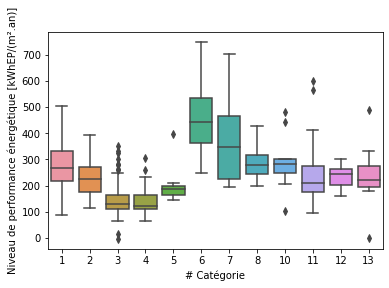

In [16]:
sns.boxplot(x='# Catégorie',y='Niveau de performance énergétique [kWhEP/(m².an)]',data=batiments)#,hue='# Catégorie')

In [17]:
batiments_matrix = batiments.pivot_table(index='Classe',columns='# Catégorie',values='Niveau de performance énergétique [kWhEP/(m².an)]',aggfunc='count').fillna(0)
#batiments_matrix = batiments_matrix.fillna(0)
batiments_matrix.head()

# Catégorie,1,2,3,4,5,6,7,8,10,11,12,13
Classe,,,,,,,,,,,,
A,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
A+,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B,8.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
B+,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
B-,12.0,3.0,15.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0


<AxesSubplot:xlabel='# Catégorie', ylabel='Classe'>

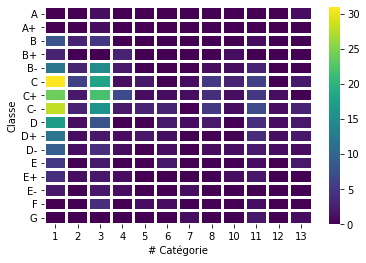

In [18]:
sns.heatmap(batiments_matrix,cmap='viridis',linecolor='white',linewidth=2)  #cmap='viridis' / 'coolwarm' / 'plasma' / 'inferno'